<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
    <td style="text-align:left; background-color:transparent">Datenanalyse mit Python</td>
    <td style="text-align:right; background-color:transparent">Manfred Hammerl</td>
  </tr>
</table>

# 8) Variablen umkodieren

Zu Beginn wieder der Import von **Pandas** und das Einlesen unseres Datenfiles.

In [53]:
import pandas as pd

daten = pd.read_csv("C:\\Datenfiles\\daten.csv")

daten.head(3).round(2)

,sex,age,wohnort,volksmusik,hardrock
0,1,50,2,2.67,3.67
1,1,57,1,1.00,3.33
2,2,66,3,2.00,4.33


### 8.1) Typologie erstellen

Hin und wieder benötigt man eine Variable, die aus einer Kombination mehrerer anderer Variablen gebildet wird. Ein typisches Beispiel wäre in Studien bei SchülerInnen oder StudentInnen das elterliche Bildungsniveau. Man erhebt dabei das Bildungsniveau der Mutter und jenes des Vaters und kann diese Informationen dann in einer Variable 'elterliches Bildungsniveau' kombinieren (z.B. beide Matura, eine/r mit Matura, beide ohne Matura - man erhält hier also 4 Kategorien).

In unserem Datensatz haben wir die Variablen *sex* und *wohnort*, aus welchen wir eine solche Typologie (als neue Variable *typo*) bilden können. Uns interessiert, wieviele Frauen bzw. Männer in ländlicher Umgebung und wieviele in Städten wohnen. Die *wohnort* Kategorie 2 (kleinstädtische Umgebung) lassen wir außen vor. Die Codierung erinnert entfernt an die Syntax, mit der in SPSS solche Typologien gebildet werden können. Mit **loc** lassen sich Bedingungen formulieren und definierte Werte einer neuen Variable zuordnen.

[5 ways to apply an IF condition in pandas DataFrame](https://datatofish.com/if-condition-in-pandas-dataframe/)

In [54]:
daten.loc[(daten.sex == 1) & (daten.wohnort == 1), 'typo'] = 'frau_land' # neue Werte können natürlich auch Zahlen sein
daten.loc[(daten.sex == 1) & (daten.wohnort == 3), 'typo'] = 'frau_stadt'
daten.loc[(daten.sex == 2) & (daten.wohnort == 1), 'typo'] = 'mann_land'
daten.loc[(daten.sex == 2) & (daten.wohnort == 3), 'typo'] = 'mann_stadt'
daten.loc[(daten.wohnort==2), 'typo'] = 'ohne Zuordnung'   # als Restkategorie sozusagen...

Die neue Variable *typo* wurde dem Datensatz wie unten ersichtlich angefügt und enthält unsere definierten Zuordnungen.

In [55]:
daten.head(5)

,sex,age,wohnort,volksmusik,hardrock,typo
0,1,50,2,2.666667,3.666667,ohne Zuordnung
1,1,57,1,1.000000,3.333333,frau_land
2,2,66,3,2.000000,4.333333,mann_stadt
3,1,50,2,2.333333,2.666667,ohne Zuordnung
4,1,60,3,2.333333,3.000000,frau_stadt


Nun könnten wir uns die Häufigkeiten dieser Typologie ansehen. Am besten gleich in Form einer Grafik.

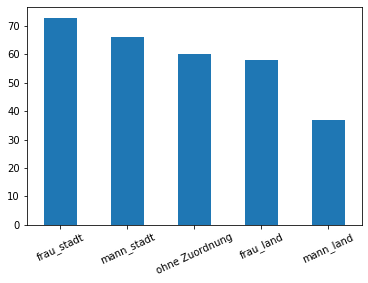

In [56]:
grafik1 = daten['typo'].value_counts(normalize = False)

# 'normalize=True' und '*100', dann hätte man Prozentwerte statt absoluter Häufigkeiten

ax = grafik1.plot.bar(rot = 25) # 'rot' = Rotation der Y-Achsen Labels in Grad

Als 'Abkürzung' bietet sich folgende direkte Methode (nur eine Codezeile) an (diesmal sind relative Häufigkeiten, also Prozentwerte, abgebildet):

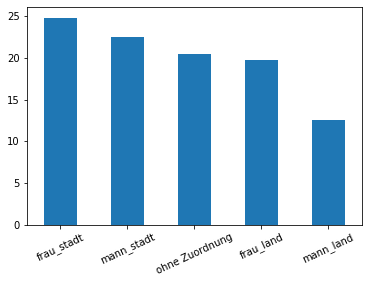

In [57]:
ax = (daten['typo'].value_counts(normalize = True)*100).plot.bar(rot = 25) # relative Häufigkeiten, multipliziert mit 100 (d.h.: Prozent)

### 8.2) Alterskategorien in neuer Variable erstellen

Relativ oft muss man metrische Variablen mit sehr vielen Ausprägungen in wenige Kategorien umkodieren. Ein klassisches Beispiel sind Alterskategorien. Wenn wir die Variable *age* aus unserem Datensatz in ein paar Alterskategorien umkodieren möchten, sehen wir uns zuerst die Verteilung der Altersvariable an. Am besten betrachten wir die kumulierten (**cumsum()**) relativen (*normalize = True*) Häufigkeiten.

[Recode Data](https://pythonfordatascience.org/recode-data/)

[Creating a Cumulative Frequency Column in a Dataframe Python](https://stackoverflow.com/questions/38891974/creating-a-cumulative-frequency-column-in-a-dataframe-python)

In [58]:
daten['age'].value_counts(sort = False, normalize = True).cumsum().head(10).round(4)*100 # kumulierte Prozentwerte

15     0.34
20     0.68
21     3.06
22     7.82
23    13.27
24    17.35
25    23.13
26    28.91
27    32.65
28    36.05
Name: age, dtype: float64

In der Praxis würden wir uns natürlich die gesamte Ausgabe ansehen und nicht nur - aus Platzgründen - die ersten zehn Werte wie in der Ausgabe oben. Wenn man das macht, kann man anhand der kumulierten relativen Häufigkeiten ablesen, welche Alterskategorien zu bilden sind, wenn man einigermaßen gleich große Kategorien (was die darin enthaltene Fallzahl betrifft) erhalten möchte.

Mit folgender selbst zu schreibender Funktion definieren wir vier Alterskategorien, die in etwa ähnlich große Kategorien liefern. Danach rufen wir diese selbst geschriebene Funktion *altkat* mit der Funktion **apply()** auf und wenden sie auf unsere Altersvariable *age* an. Die ermittelten Alterskategorien werden sodann in die neue Variable *Altersgruppe* übernommen.

[pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [59]:
def altkat(age):
    if age <= 25:
        return "15 - 25 Jahre"
    elif 26 <= age <= 35:
        return "26 - 35 Jahre"
    elif 36 <= age <= 49:
        return "36 - 49 Jahre"
    elif age > 49:
        return "50 Jahre plus"

daten['Altersgruppe'] = daten['age'].apply(altkat)

Eine Häufigkeitsauszählung der neu erstellten Variable *Altersgruppe* ergibt, dass jeweils rund 70 Personen in den vier Altersgruppen aufscheinen.

In [60]:
daten['Altersgruppe'].value_counts(sort = False).sort_index() # 'sort_index()' um nach den Alterskategorien zu sortieren

15 - 25 Jahre    68
26 - 35 Jahre    71
36 - 49 Jahre    78
50 Jahre plus    77
Name: Altersgruppe, dtype: int64

Die kumulierten relativen Summen zeigen, dass die erste Altersgruppe (15 - 15 Jahre) mit knapp über 23% etwas unterrepräsentiert ist (bei vier Altersgruppen würde man sich 25% pro Altersgruppe erwarten - eine solch exakte Gruppenaufteilung ist in der Praxis jedoch kaum möglich).

In [61]:
daten['Altersgruppe'].value_counts(sort = False, normalize = True).sort_index().cumsum().round(4)*100 # Prozentwerte

15 - 25 Jahre     23.13
26 - 35 Jahre     47.28
36 - 49 Jahre     73.81
50 Jahre plus    100.00
Name: Altersgruppe, dtype: float64

Hier ohne **cumsum()**, d.h. wir erhalten die relativen Häufigkeiten jeder Altersgruppe.

In [62]:
daten['Altersgruppe'].value_counts(sort = False, normalize = True).sort_index().round(4)*100 # Prozentwerte

15 - 25 Jahre    23.13
26 - 35 Jahre    24.15
36 - 49 Jahre    26.53
50 Jahre plus    26.19
Name: Altersgruppe, dtype: float64

##### Kontrolle der Umkodierung

Wann immer man Variablen umkodiert, sollte man die Korrektheit der Umkodierung prüfen, bevor man mit den umkodierten neuen Variablen weitere Auswertungen durchführt. Die folgende (teilweise) Darstellung des Dataframes liefert schon erste Indizien dafür, dass die Umkodierung richtig sein dürfte.

In [63]:
daten.sort_values(by = 'age', ascending = True)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe
260,2,15,1,3.000000,3.500000,mann_land,15 - 25 Jahre
176,2,20,3,4.666667,2.333333,mann_stadt,15 - 25 Jahre
64,1,21,3,4.666667,1.000000,frau_stadt,15 - 25 Jahre
77,1,21,3,5.000000,1.333333,frau_stadt,15 - 25 Jahre
255,2,21,2,4.666667,1.000000,ohne Zuordnung,15 - 25 Jahre
...,...,...,...,...,...,...,...
88,1,73,1,1.666667,4.000000,frau_land,50 Jahre plus
18,1,75,3,3.000000,5.000000,frau_stadt,50 Jahre plus
97,2,75,3,2.000000,3.666667,mann_stadt,50 Jahre plus
136,2,77,1,2.000000,5.000000,mann_land,50 Jahre plus


Mit einer Kreuztabelle kann man die Umkodierung genau überprüfen, ohne dafür die 294 Zeilen des Dataframes durchsehen zu müssen. Aus Platzgründen sind unten nur die ersten zehn Zeilen der Kreuztabelle dargestellt - die Umkodierung ist jedenfalls richtig, soviel sei verraten.

In [64]:
pd.crosstab(daten.age, daten.Altersgruppe).head(10)

Altersgruppe,15 - 25 Jahre,26 - 35 Jahre,36 - 49 Jahre,50 Jahre plus
age,,,,
15,1,0,0,0
20,1,0,0,0
21,7,0,0,0
22,14,0,0,0
23,16,0,0,0
24,12,0,0,0
25,17,0,0,0
26,0,17,0,0
27,0,11,0,0


### 8.3) Mediansplit

Mit der Funktion **qcut()** kann man automatisch (ungefähr) gleich große (was die Fallzahl betrifft) Kategorien erstellen. Erstellt man 2 Kategorien, handelt es sich um einen sog. Mediansplit. Dies wird im folgenden Beispiel gezeigt. Der Parameter *retbins = True* gibt uns die Kategorieneinteilung wieder (die sog. *bins*).

[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [65]:
out, bins = pd.qcut(daten ['age'], 2, labels = ["jung", "alt"], retbins = True) # 'out' = output, 'bins' = klassifizierung

# hier in 2 gleich große Gruppen (Mediansplit) aufgeteilt, auch 3, 4, 5, usw. Gruppen sind natürlich möglich.

out

0       alt
1       alt
2       alt
3       alt
4       alt
       ... 
289    jung
290    jung
291    jung
292     alt
293    jung
Name: age, Length: 294, dtype: category
Categories (2, object): ['jung' < 'alt']

Diese  Verfahren liefert uns zwei Outputs: *out* und *bins*. *out* liefert uns eine Übersicht der zugeordneten Kategorien pro Zeile (siehe oben), *bins* liefert uns die Kategorieneinteilung (siehe unten).

In [66]:
bins

array([15., 36., 92.])

Die Variable *Alter* wurde in 2 Gruppen aufgeteilt, Gruppe 'jung' von 15 bis 36 und Gruppe 'alt' von >36 bis 92 (d.h. von 37 bis 92).

Hier zum Vergleich das Originalalter:

In [67]:
daten['age']

0      50
1      57
2      66
3      50
4      60
       ..
289    24
290    36
291    31
292    37
293    23
Name: age, Length: 294, dtype: int64

Und hier zum Vergleich der **Median** des Alters, er liegt bei 36 Jahren. Somit wurde oben wie erwähnt ein Mediansplit durchgeführt.

In [68]:
daten['age'].median()

36.0

##### Einfügen der Mediansplit-Variable ins Dataframe

Mit folgender Codezeile können wir den Mediansplit wie vorhin berechnen und als neue Variable gleich direkt in unser Dataframe einfügen.

In [69]:
daten['age_mediansplit'] = pd.qcut(daten ['age'], 2, labels = ["jung", "alt"])

In [70]:
daten.head(3)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit
0,1,50,2,2.666667,3.666667,ohne Zuordnung,50 Jahre plus,alt
1,1,57,1,1.000000,3.333333,frau_land,50 Jahre plus,alt
2,2,66,3,2.000000,4.333333,mann_stadt,50 Jahre plus,alt


In [71]:
daten.tail(3)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit
291,2,31,1,5.000000,4.666667,mann_land,26 - 35 Jahre,jung
292,1,37,3,5.000000,1.000000,frau_stadt,36 - 49 Jahre,alt
293,1,23,1,4.333333,3.333333,frau_land,15 - 25 Jahre,jung


### 8.4) Klassifizierung nach gleich großen Intervallen

Eine ähnliche, aber nicht idente, Methode liegt mit der Funktion **cut()** vor.

[pandas.cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html#pandas.cut)

Es werden hierbei nämlich keine gleich großen Gruppen (was die Fallzahl betrifft) gebildet, sondern die Funktion **cut()** richtet sich nach den Werten, d.h. z.B. von 20-40, 40-60, 60-80, usw., also jeweils 20 Abstand, egal wie viele Fälle enthalten sind.

In [72]:
out1, bins1 = pd.cut(daten['age'], 3, retbins = True, labels = ['jung', 'mittel', 'alt'])

In [73]:
out1

0      mittel
1      mittel
2      mittel
3      mittel
4      mittel
        ...  
289      jung
290      jung
291      jung
292      jung
293      jung
Name: age, Length: 294, dtype: category
Categories (3, object): ['jung' < 'mittel' < 'alt']

In [74]:
bins1.round(2)

array([14.92, 40.67, 66.33, 92.  ])

**cut()** hat also Alterskategorien gebildet, welche von 15-40, 41-66 und 67-92 reichen; also jeweils 26-Jahre-Intervalle.

##### Einfügen der Klassifizierungsvariable ins Dataframe

Mit folgender Codezeile lässt sich diese Variable direkt ins Dataframe einfügen.

In [75]:
daten['Alterskategorien'] = pd.cut(daten['age'], 3, labels = ['jung', 'mittel', 'alt'])

In [76]:
daten.head(3)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit,Alterskategorien
0,1,50,2,2.666667,3.666667,ohne Zuordnung,50 Jahre plus,alt,mittel
1,1,57,1,1.000000,3.333333,frau_land,50 Jahre plus,alt,mittel
2,2,66,3,2.000000,4.333333,mann_stadt,50 Jahre plus,alt,mittel


In [77]:
daten.tail(3)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit,Alterskategorien
291,2,31,1,5.000000,4.666667,mann_land,26 - 35 Jahre,jung,jung
292,1,37,3,5.000000,1.000000,frau_stadt,36 - 49 Jahre,alt,jung
293,1,23,1,4.333333,3.333333,frau_land,15 - 25 Jahre,jung,jung


### 8.5) Dummyvariablen erstellen

Pandas bietet mit der Funktion **get_dummies()** ein einfache Möglichkeit, Dummyvariablen automatisch zu erstellen. Im Folgenden sollen aus der Variable *wohnort* (drei Ausprägungen) Dummyvariablen erstellt werden. Die Variable *wohnort* ist nominal (bzw. ordinal, je nach Interpretation), aber nicht dichotom, kann also bspw. in Regressionsanalysen nicht als unabhängige Variable eingesetzt werden. Dummyvariablen, zwar im Prinzip noch nominal, aber als dichotome Variablen gleichzeitig auch als intervallskalierte Variablen zu interpretieren, jedoch schon.

[pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [78]:
dummy = pd.get_dummies(daten['wohnort'])

dummy.head()

,1,2,3
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


Die Dummyvariablen sind einstweilen im Objekt (Dataframe) *dummy* gespeichert. Wir erfahren gleich, wir die Dummyvariablen in unseren ursprünglichen Datensatz integrieren.

Aber jedenfalls wurde richtig umkodiert, wenn wir obige Dummy-Tabelle mit untenstehendem Auszug aus den Originaldaten zum *wohnort* vergleichen:

In [79]:
daten['wohnort'].head()

0    2
1    1
2    3
3    2
4    3
Name: wohnort, dtype: int64

##### Einfügen der Dummyvariablen ins Dataframe

Das Einfügen der Dummyvariablen ins Dataframe erfolgt - wie bei den beiden vorangehenden Beispielen - leicht mit einer Codezeile. Allerdings muss man dabei vorab wissen, wieviele Dummyvariablen erstellt werden - denn genau so viele neue Variablen muss man anlegen! In unserem Fall werden 3 Dummyvariablen erstellt, also legen wird 3 neue Variablen (*D1*, *D2*, *D3*) an!

In [80]:
daten[['D1', 'D2', 'D3']] = pd.get_dummies(daten['wohnort'])

In [81]:
daten.head()

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit,Alterskategorien,D1,D2,D3
0,1,50,2,2.666667,3.666667,ohne Zuordnung,50 Jahre plus,alt,mittel,0,1,0
1,1,57,1,1.000000,3.333333,frau_land,50 Jahre plus,alt,mittel,1,0,0
2,2,66,3,2.000000,4.333333,mann_stadt,50 Jahre plus,alt,mittel,0,0,1
3,1,50,2,2.333333,2.666667,ohne Zuordnung,50 Jahre plus,alt,mittel,0,1,0
4,1,60,3,2.333333,3.000000,frau_stadt,50 Jahre plus,alt,mittel,0,0,1


### 8.6) Variablen umpolen

Dies geht nun schon in Richtung 'Variablen berechnen', was Inhalt des nächsten Kapitels ist, passt jedoch verständlicherweise noch in dieses Kapitel zum Thema 'umkodieren von Variablen'. Oft kommt es in empirischen Studien vor, dass Items unterschiedlich gepolt sind, aber für die Auswertung in eine einheitliche Richtung gebracht werden müssen. Dies erreicht man durch eine sehr einfache Berechnung. Dabei wird die Originalvariable nicht überschrieben sondern eine neue Variable erstellt und ins Dataframe eingefügt.

[Deriving New Columns & Defining Python Functions](https://mode.com/python-tutorial/defining-python-functions/)

In [82]:
daten["volksmusik_umk"] = (daten["volksmusik"]*(-1))+6 # z.B. +6 (5-stufige), +7 (6-stufige Antwortskala), usw.

Unsere Originalvariable *volksmusik* hat Ausprägungen von 1 bis 5. Will man diese Variable umpolen, multipliziert man mit -1. Die Ausprägungen reichen dann von -5 bis -1. Um wieder auf eine Spannweite von 1 bis 5 zu kommen, wird die Zahl 6 addiert. Fertig, die Variable *volksmusik_umk* weist die gleiche Spannweite im positiven Bereich auf wie zuvor, wurde jedoch inhaltlich umgepolt. Was zuvor 1 (höre sehr gerne Volksmusik) war, ist nun 5 (höre sehr gerne Volksmusik).

In [83]:
daten.head().round(2)

,sex,age,wohnort,volksmusik,hardrock,typo,Altersgruppe,age_mediansplit,Alterskategorien,D1,D2,D3,volksmusik_umk
0,1,50,2,2.67,3.67,ohne Zuordnung,50 Jahre plus,alt,mittel,0,1,0,3.33
1,1,57,1,1.00,3.33,frau_land,50 Jahre plus,alt,mittel,1,0,0,5.00
2,2,66,3,2.00,4.33,mann_stadt,50 Jahre plus,alt,mittel,0,0,1,4.00
3,1,50,2,2.33,2.67,ohne Zuordnung,50 Jahre plus,alt,mittel,0,1,0,3.67
4,1,60,3,2.33,3.00,frau_stadt,50 Jahre plus,alt,mittel,0,0,1,3.67


##### Kontrolle der Umkodierung mittels Kreuztabellen

Visuell kann man aus obigem Ausschnitt des Dataframes schon ablesen, dass höchstwahrscheinlich korrekt umkodiert wurde. Dennoch empfiehlt es sich immer, jegliche Umkodierung zu überprüfen. Bei Umkodierungen von Items mit wenigen Ausprägungen geht das sehr übersichtlich mit Kreuztabellen. Alle Werte ausserhalb der Diagonalen müssen *0* sein! In unserem Fall haben die beiden Variablen etwas mehr Ausprägungen, sodass dies nicht ganz so übersichtlich ist.

In [84]:
pd.crosstab(round(daten.volksmusik, 2), round(daten.volksmusik_umk, 2))

# die built-in Funktion 'round()' wurde verwendet, um die Spalten-/Zeilenbeschriftungen kurz und somit den Output übersichtlich zu halten!

volksmusik_umk,1.00,1.33,1.50,1.67,2.00,2.33,2.67,3.00,3.33,3.67,4.00,4.33,4.67,5.00
volksmusik,,,,,,,,,,,,,,
1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1.33,0,0,0,0,0,0,0,0,0,0,0,0,4,0
1.67,0,0,0,0,0,0,0,0,0,0,0,7,0,0
2.00,0,0,0,0,0,0,0,0,0,0,14,0,0,0
2.33,0,0,0,0,0,0,0,0,0,11,0,0,0,0
2.67,0,0,0,0,0,0,0,0,10,0,0,0,0,0
3.00,0,0,0,0,0,0,0,21,0,0,0,0,0,0
3.33,0,0,0,0,0,0,27,0,0,0,0,0,0,0
3.67,0,0,0,0,0,21,0,0,0,0,0,0,0,0


##### Kontrolle der Umkodierung mittels Korrelation

Bei Variablen mit vielen Ausprägungen kann man auch einfach die Korrelation zwischen Originalvariable und umkodierter Variable berechnen. Alles andere als ein Korrelationskoeffizient von '-1' würde auf Fehler bei der Umkodierung hinweisen.

[pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [85]:
daten[['volksmusik', 'volksmusik_umk']].corr(method = 'pearson')

,volksmusik,volksmusik_umk
volksmusik,1.0,-1.0
volksmusik_umk,-1.0,1.0


Ebenso kann ein Streudiagramm mit den beiden Variablen visuell Aufschluss über den Erfolg der Umkodierung geben. Jeglicher Ausreißer von einer diagonalen Linie würde auf einen Fehler bei der Umkodierung hinweisen.

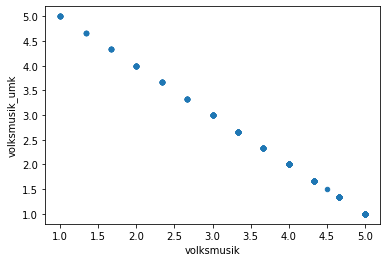

In [86]:
ax = daten.plot.scatter(x = 'volksmusik', y = 'volksmusik_umk')

<table style="width:100%; background-color:transparent; font-style:italic">
  <tr style="background-color:transparent">   
     <td style="text-align:center; background-color:transparent">https://github.com/manfred2020/DA_mit_Python</td>
  </tr>
</table>